本單元將嘗試抓取股票資訊來分析股票，取出歷史收盤資料畫出圖表、取得收益率(投資風險會使用到)、每天的波動。

## 06-1.用 Python pandas_datareader 抓台灣股價

- [pandas-datareader文件](https://pandas-datareader.readthedocs.io/en/latest/index.html)

回傳的格式規格

- Open     :開盤價
- High     :最高價
- Low      :最低價
- Close    :收盤價
- Volume   :交易量
- Adj Close:經過調整的收盤價

### 06-1-1.基本使用

## yahoo finance
* reference: https://algotrading101.com/learn/yahoo-finance-api-guide/
* reference: https://algotrading101.com/learn/backtrader-for-backtesting/
* For example:
<pre>
import yfinance as yf
msft = yf.Ticker("MSFT")
print(msft.info)
</pre>

In [7]:
!pip install pandas_datareader 
!pip install yfinance --upgrade --no-cache-dir
!pip install yahoo_fin --upgrade
!pip install requests_html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf

In [9]:
yf.pdr_override()

# 語法是 yf.download(
#    股票代號,
#    start=開始日期,
#    end=完結日期
#    )
* yf.download('TSM TSLA',start='2016-01-01',end='2021-01-01')

In [10]:
import pandas as pd
import pandas_datareader.data as web
import datetime


# 畫圖
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [11]:
# 用 yahoo finance ，並有設定起訖日區間
start = datetime.datetime(2022, 1, 1)
end = datetime.datetime(2022, 4, 17)

# 台灣股市的話要用 股票代號 加上 .TW
#df_2317 = web.DataReader('2317.TW', 'yahoo', start=start, end=end)
#df_2330 = web.DataReader('2330.TW', 'yahoo', start=start, end=end)
#df_0050 = web.DataReader('0050.TW', 'yahoo', start=start, end=end)
df_2317 = yf.download('2317.TW',start=start,end=end)
df_2330 = yf.download('2330.TW',start=start,end=end)
df_0050 = yf.download('0050.TW',start=start,end=end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


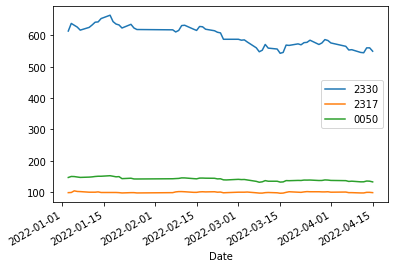

In [12]:
fig = plt.figure()
df_2330['Adj Close'].plot(label="2330")
df_2317['Adj Close'].plot(label="2317")
df_0050['Adj Close'].plot(label="0050")
plt.legend()

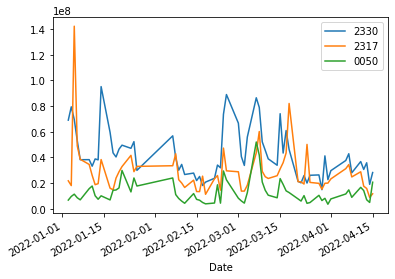

In [13]:
#交易量
fig = plt.figure()
df_2330['Volume'].plot(label="2330")
df_2317['Volume'].plot(label="2317")
df_0050['Volume'].plot(label="0050")

plt.legend()

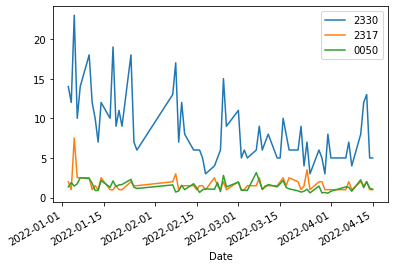

In [14]:
#每日波動
df_2330['High-Low'] = df_2330['High'] - df_2330['Low']
df_2317['High-Low'] = df_2317['High'] - df_2317['Low']
df_0050['High-Low'] = df_0050['High'] - df_0050['Low']



fig = plt.figure()
df_2330['High-Low'].plot(label="2330")
df_2317['High-Low'].plot(label="2317")
df_0050['High-Low'].plot(label="0050")

plt.legend()

### 06-1-2.比較多個股票

In [18]:
import yfinance as yf
yf.pdr_override()
start = datetime.datetime(2022, 1, 1)
end = datetime.datetime(2022, 12, 31)
df_stock = yf.download(['2330.TW', '0050.TW', '2317.TW'],start=start,end=end)

[*********************100%***********************]  3 of 3 completed


In [19]:
df_stock['Adj Close']['2317.TW'].tail()

Date
2022-12-26    101.000000
2022-12-27    100.500000
2022-12-28    100.500000
2022-12-29     99.699997
2022-12-30     99.900002
Name: 2317.TW, dtype: float64

<Axes: xlabel='Date'>

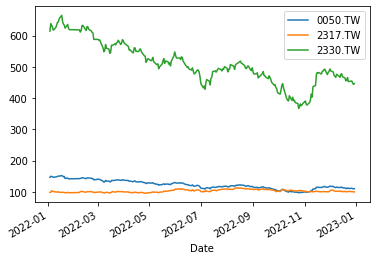

In [20]:
adjClose = df_stock['Adj Close']
adjClose.plot()

import yfinance as yf
yf.pdr_override()
start = datetime.datetime(2022, 1, 1)
end = datetime.datetime(2022, 12, 31)
df_stock = yf.download(['2330.TW', '0050.TW', '2317.TW'],start=start,end=end)###  06-1-3.比較台積電(2330)和鴻海(2317)的收益率關係，使用閃點圖

In [21]:
import yfinance as yf
yf.pdr_override()
start = datetime.datetime(2017, 1, 1)
end = datetime.datetime(2022, 12, 31)
df_stock = yf.download(['2330.TW', '2317.TW'],start=start,end=end)

[*********************100%***********************]  2 of 2 completed


In [24]:
plt.rcParams['axes.unicode_minus']=False
adjClose_pct = adjClose.pct_change()
#sns.jointplot('2330.TW','2317.TW',adjClose_pct, kind="scatter")
sns.jointplot(df_stock,adjClose_pct, kind="scatter")

TypeError: ignored

其中x軸是第一個參數，y軸是第二個參數，這張圖表傳達的訊息

- 當x和y的座標都小於0，代表那天1和2都是跌，大於0則漲
- 當x和y的值越相近時，則閃點圖會越趨向一直線。代表兩個股票越正相關

###  06-1-4.比較台積電(2330)和鴻海(2317)的收益率關係，使用線性回歸


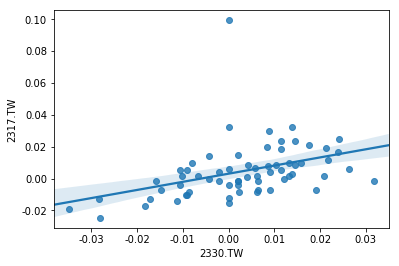

In [ ]:
sns.regplot('2330.TW','2317.TW',adjClose_pct)

###  06-1-5.比較多家收益率關係

In [ ]:
start = datetime.datetime(2019, 1, 1)
campany=['2330.TW', '0050.TW', '2317.TW', '3008.TW']
df_stock = web.DataReader(campany, 'yahoo', start=start)

In [ ]:
adjClose = df_stock['Adj Close']
plt.rcParams['axes.unicode_minus']=False
adjClose_pct = adjClose.pct_change()

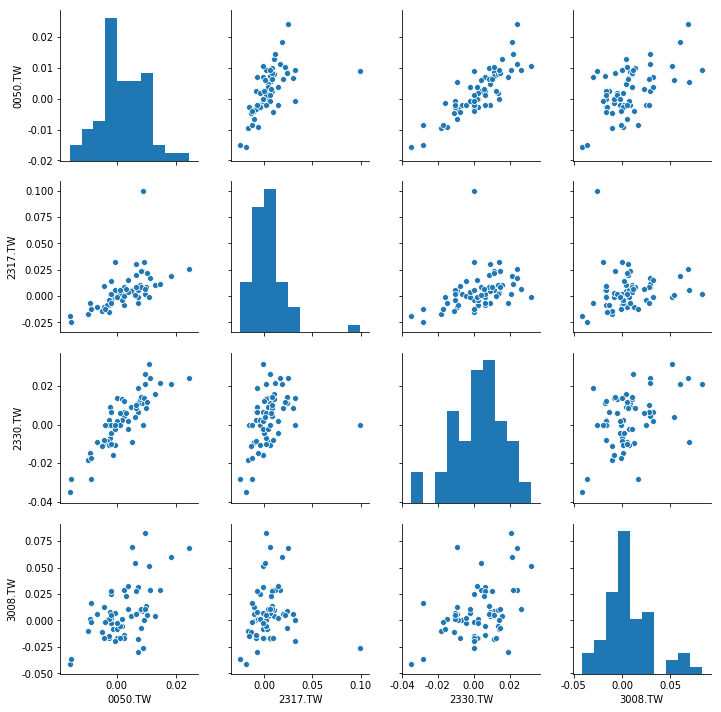

In [ ]:
sns.pairplot(adjClose_pct.dropna())

## 06-2.用 Python twstock 抓台灣股價

In [ ]:
!pip install twstock

    100% |████████████████████████████████| 1.9MB 537kB/s ta 0:00:011


In [ ]:
import twstock
twstock.codes

{'700001': StockCodeInfo(type='上櫃認購(售)權證', code='700001', name='新普台新85購01', ISIN='TW18Z7000011', start='2018/10/01', market='上櫃', group='', CFI='RWSCCE'),
 '700002': StockCodeInfo(type='上櫃認購(售)權證', code='700002', name='環球晶台新84購01', ISIN='TW18Z7000029', start='2018/10/01', market='上櫃', group='', CFI='RWSCCE'),
 '700003': StockCodeInfo(type='上櫃認購(售)權證', code='700003', name='中美晶群益84購01', ISIN='TW18Z7000037', start='2018/10/01', market='上櫃', group='', CFI='RWSCCA'),
 '700004': StockCodeInfo(type='上櫃認購(售)權證', code='700004', name='中美晶群益84購02', ISIN='TW18Z7000045', start='2018/10/01', market='上櫃', group='', CFI='RWSCCA'),
 '700005': StockCodeInfo(type='上櫃認購(售)權證', code='700005', name='元太群益84購01', ISIN='TW18Z7000052', start='2018/10/01', market='上櫃', group='', CFI='RWSCCA'),
 '700006': StockCodeInfo(type='上櫃認購(售)權證', code='700006', name='宇隆群益84購01', ISIN='TW18Z7000060', start='2018/10/01', market='上櫃', group='', CFI='RWSCCA'),
 '700007': StockCodeInfo(type='上櫃認購(售)權證', code='700007', name='聯亞群

In [ ]:
twstock.codes['2317']

StockCodeInfo(type='股票', code='2317', name='鴻海', ISIN='TW0002317005', start='1991/06/18', market='上市', group='其他電子業', CFI='ESVUFR')

###  twstock.Stock()
- 之後實現要抓取的股票的歷史資料(抓取最近31天的資料)，假設要抓雷科(6207)

In [ ]:
# 抓取歷史資料
stock_0050 = twstock.Stock('0050')

In [ ]:
stock_0050.price[-5:]       # 近五日之收盤價
# stock_0050.high[-5:]        # 近五日之盤中高點
# stock_0050.low[-5:]         # 近五日之盤中低點
# stock_0050.date[-5:]        # 近五日的日期

[81.15, 81.1, 81.85, 82.1, 82.75]

### twstock.fetch()
- 如果要抓取超過31天的資料可以使用fetch()

In [ ]:
stock_6207_2017_10 = stock_6207.fetch(2018,2)      # 獲取 2018 年 2 月之股票資料

當然還可以使用取得從過去到現在的股價，下面示範從2018年01月到現在的資料，並且用開盤價和收盤價畫成圖表

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


stock_6207_2018 = stock_6207.fetch_from(2018,1)     # 獲取 2018 年 01 月至今日之股票資料
stock_6207_2018_pd = pd.DataFrame(stock_6207_2018)
stock_6207_2018_pd = stock_6207_2018_pd.set_index('date')


fig = plt.figure(figsize=(10, 6))
plt.plot(stock_6207_2018_pd.close, '-' , label="Close")
plt.plot(stock_6207_2018_pd.open, '-' , label="Open")
plt.title('(6207)2018 Open/Close',loc='right')
# loc->title的位置
plt.xlabel('Date')
plt.ylabel('Close')
plt.grid(True, axis='y')
plt.legend()
fig.savefig('day20_01.png')

### realtime()
- 這個套件不只可以抓取歷史資料也可以抓取即時資料。
- 只會抓出一筆

In [ ]:
stock_0050_real = twstock.realtime.get('0050')
stock_0050_real

In [ ]:
# 抓取多個股票的方式 
twstock.realtime.get(['2330', '2337', '2409'])

## 06-3.繪製K線圖 

- K線圖：根據股價一天走勢的 4 個價位：開盤價、收盤價、最高價、最低價繪製而成。開盤價與收盤價，會構成 K 線的實體（Body），最高價、最低價分別成為上影線（Shadow）及下影線。如果收盤價高於開盤價，Body 為紅色；收盤價低於開盤價，Body 為黑色或是綠色。

- Ta-lib：python套件，專門用來計算金融技術指標。
    - 可惜在Azure notebook無法順利安裝，採用其他替代方案進行教學。



In [ ]:
#安裝相關套件
!pip install pandas_datareader
!pip install mpl_finance
!pip install fix_yahoo_finance


  Stored in directory: /home/nbuser/.cache/pip/wheels/67/db/24/04ddd06ec9a5e4500b44c13d8e95898f5b90b512303e385de8
Successfully built mpl-finance
  Stored in directory: /home/nbuser/.cache/pip/wheels/ff/54/13/c05f05a325555b5334975bb1b4bac7bf893e10ca3b0f65cb50
Successfully built fix-yahoo-finance


In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'   #預設為PNG，放大會糊掉，使用此指令則改為向量圖svg，在瀏覽器放大檢視一樣清晰

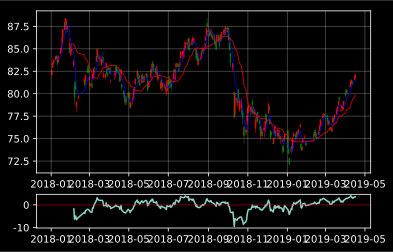

In [ ]:
# Python 交易策略應用「KD」作為交易策略程式範例
from pandas_datareader import data as web
from mpl_finance import candlestick_ohlc
from matplotlib import pyplot as plt
from matplotlib import style

import matplotlib.dates as mdates
import fix_yahoo_finance as yf
import datetime as dt
import pandas as pd
import numpy as np
import time

style.use('dark_background')

yf.pdr_override()

fig = plt.figure()
ax1 = fig.add_subplot(111)

stock = "0050"

Analysis = 'stock0050TW.csv'

start = dt.datetime(2018, 1, 1)
end = dt.datetime(2019, 4, 15)

df = web.DataReader(str(stock) + '.TW','yahoo', start, end)
df.to_csv(Analysis)

time.sleep(2)

data = pd.read_csv(Analysis, parse_dates=True, index_col='Date')
data.head()

close = data["Close"]

top = plt.subplot2grid((12, 9), (0, 0), rowspan=9, colspan=9)
bottom = plt.subplot2grid((12, 9), (10, 0), rowspan=2, colspan=9, sharex=top)


def bias(ma):
    data['MA25'] = data['Close'].rolling(window=ma).mean()
    data['BIAS'] = (data['Close'] - data['MA25']) / data['MA25'] * 100
    return data['BIAS']

bias = bias(25)

moving_avg = close.rolling(5).mean()
moving_avg20 = close.rolling(20).mean()

data = data.reset_index()
data['Date'] = data['Date'].apply(lambda d: mdates.date2num(d.to_pydatetime()))
candlestick = [tuple(x) for x in data[['Date', 'Open', 'High', 'Low', 'Close']].values]
candlestick_ohlc(top, candlestick, width=0.7, colorup='r', colordown='green', alpha=0.8)

top.plot(moving_avg, color='b', linewidth=1, alpha=0.7, label='MA5')
top.plot(moving_avg20, color='r', linewidth=1, alpha=0.7, label='MA20')
top.grid(which='both', alpha=0.3)

bottom.plot(bias)
bottom.axhline(0, color='r', alpha=0.3)

plt.savefig('./data/stock_with_KD.pdf', bbox_inches='tight')  #輸出pdf
plt.show()

### 動手做
- 現在請您自行嘗試執行範例程式碼
- 您可以置換股票代碼，畫出線圖

### reference

- [python 入門到分析股市](https://ithelp.ithome.com.tw/users/20111390/ironman/1791)